In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)
#pd.reset_option('all')
df = pd.read_csv("./Worlds_MainEvent_2024.csv", sep=';')

In [3]:
df2 = df[['Outcome','GD@15','CSD@15','XPD@15','GPM','KDA']]
df2.loc[df2.Outcome == 'Win', 'Outcome'] = 1
df2.loc[df2.Outcome == 'Loss', 'Outcome'] = 0

max_value = pd.to_numeric(df['KDA'], errors='coerce').max()
df2.loc[df2.KDA == 'Perfect_KDA', 'KDA'] = max_value

df2

,Outcome,GD@15,CSD@15,XPD@15,GPM,KDA
0,1,-176,27,-576,434,6
1,1,299,-1,1111,388,9
2,1,890,25,1117,476,18
3,1,51,-19,-1159,549,8
4,1,-109,-9,607,274,4.3
...,...,...,...,...,...,...
815,1,1202,27,1077,400,8
816,1,373,20,664,382,9
817,1,-479,2,816,447,10
818,1,1373,38,486,475,6


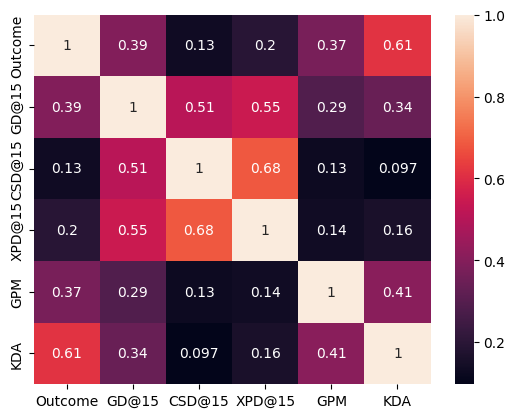

In [4]:
sns.heatmap(df2.corr(), annot = True)
plt.show()

# Team Win Rate vs Game Length

In [5]:
df_wr_length = df.filter(items=['Team','Opponent Team','Time','Outcome']).sort_values(by=['Team']).copy()
df_wr_length.loc[df_wr_length.Outcome == 'Win', 'Outcome'] = 1 
df_wr_length.loc[df_wr_length.Outcome == 'Loss', 'Outcome'] = 0

# Drop duplicates (4 duplicates per team)
df_wr_length.drop_duplicates(inplace=True)

In [6]:
def convertTimeToFrame(time: object) -> int:

    # Convert time object to int minutes
    time = datetime.strptime(str(time), "%H:%M:%S")
    minutes = time.minute + time.second / 60.0

    # Return corresponding timeframe based on minutes
    timeframe_ranges = [(15, 1), (20, 2), (25, 3), (30, 4), (35, 5), (40, 6)]

    for threshold, timeframe in timeframe_ranges:
        if minutes <= threshold:
            return timeframe
        
    # Return timeframe 7 if minutes greater than 40+
    return 7

In [7]:
def calculateWinRate(timeframe):

    total = len(timeframe)
    wins = timeframe[timeframe['Outcome'] == 1].shape[0]
    win_rate = (wins / total) * 100
    
    return win_rate

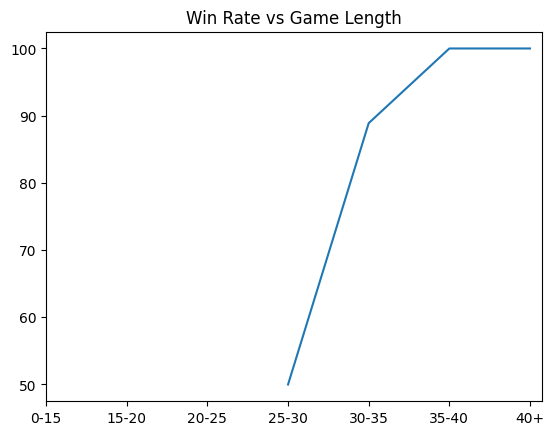

In [8]:
T1 = df_wr_length[(df_wr_length['Team'] == 'T1')].copy()

# Create new column Time Frame based on Time column
T1["Time Frame"] = T1['Time'].apply(convertTimeToFrame)

T1_wr_length = T1.groupby('Time Frame').apply(calculateWinRate, include_groups=False)

T1_wr_length.plot()
plt.title("Win Rate vs Game Length")
plt.xlabel("")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["0-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40+"])
plt.show()
